## Trabalho 2
#### Curva de luz improvisada

 - A ideia aqui é juntar as informações da fotometria feita nos notebooks anteriores para verificar se é possível identificar o evento da ocultação. Caso não seja possível, significa que a fotometria está errada.
 - <em>Os dados da ocultação foram tiradas da observação da ocultação de Umbriel, satélite de Urano, observada em 2020 </em>.

 ### Estrela Alvo e Umbriel

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import time
import multiprocessing as mp
import scipy.stats as stats
from scipy.stats import norm
from scipy.stats import poisson
from scipy.optimize import curve_fit
import astropy.io.fits as fits

In [2]:
fluxo = [31198.90, 32999.24, 29136.28, 4876.35, 7648.40, 6768.22, 34437.94, 32184.11]
ratio = [2.07, 1.53, 1.84, 0.17, 0.27, 0.43, 2.32, 2.41]
frame = range(8)

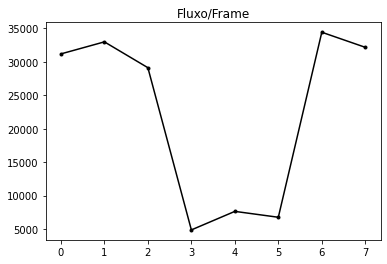

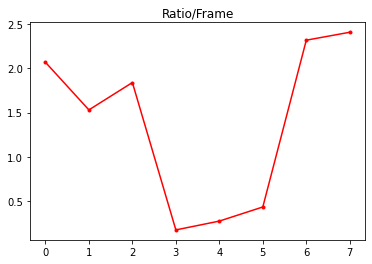

In [3]:
plt.title('Fluxo/Frame')
plt.plot(frame, fluxo, 'k.-')
#plt.plot(x, y_modelo, 'r-')
plt.show()

plt.title('Ratio/Frame')
plt.plot(frame, ratio, 'r.-')
plt.show()


In [4]:
array = np.array(list(frame))

In [5]:
def function(array, valory1,valory2,valorx1,valorx2):
    '''
    Docstring: a função pega os valores de cada ponto x e dita um y condicional. Caso o valor seja maior ou menor do que
    os valores ditados nos parametros, ele entrará como um valor especifico, parecido c o de uma caixa.
    '''
    y = valory1*np.ones(len(array)) #podia usar np.repeat(b0,len(x))
    #Mascara
    y[(array>valorx1)*(array<valorx2)] = valory2
    return y

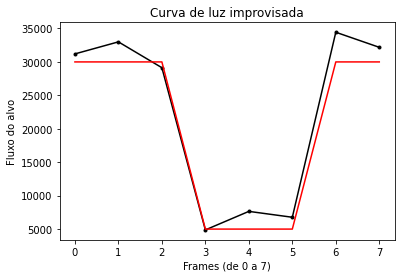

In [6]:
f_modelo = function(array,30000,5000,2,6)
plt.title('Curva de luz improvisada')
plt.xlabel('Frames (de 0 a 7)')
plt.ylabel('Fluxo do alvo')
plt.plot(frame, fluxo, 'k.-')
plt.plot(frame, f_modelo, 'r-')
plt.show()

    A curva possui formato distorcido já que foi recortado poucos frames da observação completa. Além disso, decidi por utilizar 'frames' no eixo x ao invés de tempo pois os dados relativos ao tempo eram de muito dificil manipulação. Ou seja, a diferença de tempo entre os frames está padronizada (a diferença entre 0 e 1, 1 e 2, 2 e 3... é sempre a mesma) sendo que na realidade não foi assim. Isso ajuda a explicar a grande distorção que vemos no plot do ratio(o fluxo relativo ao calibrador)/frames. Não só isso, foi utilizado apenas um calibrador, o que pode alterar um pouco o resultado dependendo da qualidade da medida deste. 

    Já que o intuito do trabalho não é trabalhar com a curva de luz em sí (e descobrir o tempo de ingresso e egresso do evento, assim como foi no trabalho 1), esta curva serve para, ao menos, identificarmos a ocultação. 
    Isso indica que a fotometria foi feita corretamente.

In [7]:
im_hd1 = fits.getheader('0859.fits')
im_hd2 = fits.getheader('0861.fits')
im_hd3 = fits.getheader('0863.fits')
im_hd4 = fits.getheader('1262.fits')
im_hd5 = fits.getheader('1268.fits')
im_hd6 = fits.getheader('1305.fits')
im_hd7 = fits.getheader('1693.fits')
im_hd8 = fits.getheader('1699.fits')
time = [im_hd1.get('DATE-OBS'),im_hd2.get('DATE-OBS'),im_hd3.get('DATE-OBS'),im_hd4.get('DATE-OBS'),im_hd5.get('DATE-OBS'),
       im_hd6.get('DATE-OBS'),im_hd7.get('DATE-OBS'),im_hd8.get('DATE-OBS')]
print(time)

['2020-09-21T08:22:01.2169755', '2020-09-21T08:22:01.5687388', '2020-09-21T08:22:01.9205021', '2020-09-21T08:23:12.0970884', '2020-09-21T08:23:13.1523757', '2020-09-21T08:23:19.6599805', '2020-09-21T08:24:27.9018766', '2020-09-21T08:24:28.9571165']


 - Verificando se a curva muda muito caso usemos o tempo no eixo x (perdoe a má leitura. A forma com que o tempo foi inscrito em DATE-OBS não é conveniente para o plot).

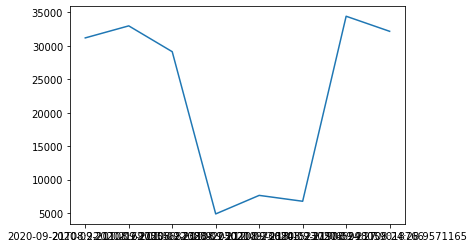

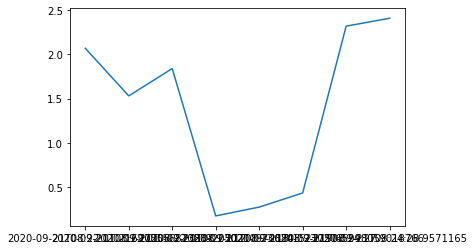

In [8]:
plt.figure
plt.plot(time,fluxo)
plt.show()
plt.plot(time,ratio)
plt.show()

    Não muda...

- Abrir o arquivo .dat saído do PRAIA_photometry e montar a curva com base nas mesmas informações e comparar com a nossa:

In [9]:
lista = []
for i in range(792):
    lista.append(str(i))

df = pd.read_csv('photometry08.dat', delim_whitespace=True)
ph = pd.DataFrame(data = df.values, index = lista, columns = ['n_img','n_alvos','n_calib','DataJu','AirMass','Fluxo_alvo','S/N_alvo','seeing (arcsec)','fator_fotometrico','Abertura_astromet','Abertura_fotomet','Anel_Fundo','Espessura_anel_fundo','xc','yc','16','17','18','19','20','21','22','23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', 'frame', '64']
                 )
f = ph.drop(columns=['16','17','18','19','20','21','22','23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '64'], axis=1)
f
# É esperado encontrar certas diferenças entre as medidas daqui e as feitas pelo PRAIA. 
# O tamanho da abertura, numero de calibradores,calculo de sinal ruído e do fundo de céu... houve variações em tudo.

,n_img,n_alvos,n_calib,DataJu,AirMass,Fluxo_alvo,S/N_alvo,seeing (arcsec),fator_fotometrico,Abertura_astromet,Abertura_fotomet,Anel_Fundo,Espessura_anel_fundo,xc,yc,frame
0,2,1,3,2.45911e+06,1,29227.4,25.2815,99.999,21.6364,1.4,1.4,9,5,216.019,177.54,200921_P07M02_0860.fits
1,3,1,3,2.45911e+06,1,31717.6,42.1365,1.648,28.7087,1.4,1.4,5,5,216.628,177.556,200921_P07M02_0861.fits
2,4,1,3,2.45911e+06,1,34099.1,29.1909,3.305,14.9283,1.5,1.5,10,5,216.813,177.175,200921_P07M02_0862.fits
3,5,1,3,2.45911e+06,1,30202.3,38.524,7.172,18.3191,1.6,1.6,5,5,217.19,176.94,200921_P07M02_0863.fits
4,6,1,3,2.45911e+06,1,31688,31.5404,1.884,17.6691,1.6,1.6,5,5,216.771,177.777,200921_P07M02_0864.fits
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
787,842,1,3,2.45911e+06,1,29949.2,32.6119,1.884,21.0075,1.6,1.6,6,5,210.416,181.63,200921_P07M02_1700.fits
788,843,1,3,2.45911e+06,1,31917.1,30.2006,1.766,14.803,1.5,1.5,5,5,210.617,181.784,200921_P07M02_1701.fits
789,844,1,3,2.45911e+06,1,33225.7,29.5501,1.884,15.7026,1.6,1.6,9,5,210.416,181.795,200921_P07M02_1702.fits
790,845,1,3,2.45911e+06,1,31254.5,31.9615,99.999,26.1957,1.5,1.5,5,5,211.264,182.009,200921_P07M02_1703.fits


 - Por algum motivo o primeiro frame (0859.fits) não foi lido. Deixarei isso de lado e montarei a curva sem esse ponto. Afinal, só queremos comparar.

In [10]:
# Monto a lista dos nomes dos frames a fim de selecionar apenas aqueles frames as quais utilizei no trabalho.
mask = ['200921_P07M02_0861.fits','200921_P07M02_0863.fits','200921_P07M02_1262.fits','200921_P07M02_1268.fits','200921_P07M02_1305.fits','200921_P07M02_1693.fits','200921_P07M02_1699.fits']
indx = [] 
for i in range(792):
    for j in range(len(mask)):
        if f['frame'][i] == mask[j]:
            indx.append(i)
indx

[1, 3, 380, 383, 420, 780, 786]

In [11]:
f['frame'][indx]

1      200921_P07M02_0861.fits
3      200921_P07M02_0863.fits
380    200921_P07M02_1262.fits
383    200921_P07M02_1268.fits
420    200921_P07M02_1305.fits
780    200921_P07M02_1693.fits
786    200921_P07M02_1699.fits
Name: frame, dtype: object

In [12]:
#Crio um dataframe novo com apenas as informações que eu procuro.
DataFrame = f[f['frame'].isin(mask)]
DataFrame

,n_img,n_alvos,n_calib,DataJu,AirMass,Fluxo_alvo,S/N_alvo,seeing (arcsec),fator_fotometrico,Abertura_astromet,Abertura_fotomet,Anel_Fundo,Espessura_anel_fundo,xc,yc,frame
1,3,1,3,2.45911e+06,1,31717.6,42.1365,1.648,28.7087,1.4,1.4,5,5,216.628,177.556,200921_P07M02_0861.fits
3,5,1,3,2.45911e+06,1,30202.3,38.524,7.172,18.3191,1.6,1.6,5,5,217.19,176.94,200921_P07M02_0863.fits
380,404,1,3,2.45911e+06,1,7182.92,11.2222,1.177,8.9454,1,1,6,5,214.957,179.761,200921_P07M02_1262.fits
383,410,1,3,2.45911e+06,1,8558.51,13.1482,1.884,11.3769,1.6,1.6,6,5,214.962,179.668,200921_P07M02_1268.fits
420,447,1,3,2.45911e+06,1,8583.38,9.2875,1.648,8.331,1.4,1.4,5,5,216.308,179.951,200921_P07M02_1305.fits
780,835,1,3,2.45911e+06,1,35691.7,46.6848,1.413,36.6904,1.2,1.2,6,5,210.972,181.009,200921_P07M02_1693.fits
786,841,1,3,2.45911e+06,1,36409.9,40.9235,1.884,22.0865,1.6,1.6,6,5,209.968,181.976,200921_P07M02_1699.fits


 - Vale lembrar que os valores estarão um tanto diferentes. A fotometria foi feita com outros valores e outro programa. No entanto, o resultado não está muito longe do encontrado pela minha fotometria.

In [13]:
y=DataFrame['Fluxo_alvo']
x=DataFrame['DataJu']

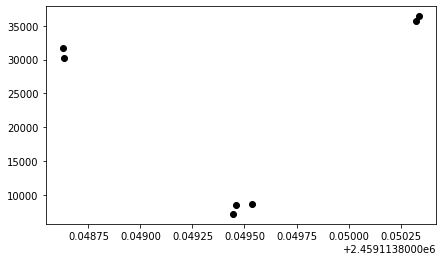

In [14]:
plt.figure(figsize = [7,4])

plt.plot(x,y, 'ko')

 - Ou seja, minha escolha de frames foi um tanto infeliz já que os frames estavam ou muito juntos ou muito afastados. O que deixa muito espaço em branco sem informação.
 - Apesar disso, foi possível visualizar a queda do fluxo de luz característico de uma ocultação estelar, isso com apenas 8 frames sendo tratados!
 - Isso reforça a validade da fotometria feita até aqui. 

 ### Calibrador

In [15]:
fluxo_cal = [15047.94, 21554.56, 15764.88, 28498.42, 27862.63, 15771.57, 14835.66, 13338.55]
def func(x,leng):
    l=[]
    for i in range(leng):
        l.append(x)
    return np.array(l)

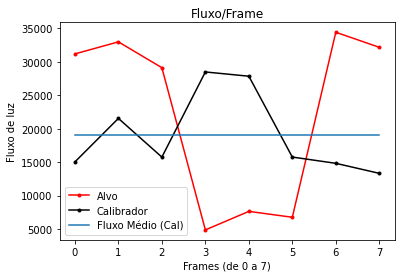

In [31]:
plt.title('Fluxo/Frame')
plt.plot(frame,fluxo, 'r.-')
plt.plot(frame, fluxo_cal, 'k.-')
plt.plot(frame, func(19000,8))
plt.legend(['Alvo', 'Calibrador','Fluxo Médio (Cal)'])
plt.xlabel('Frames (de 0 a 7)')
plt.ylabel('Fluxo de luz')
plt.show()

In [20]:
def residuo_quadrado(data, modelo):
    return np.sum((data - modelo)**2)

teste = np.linspace(15000, 20000, 150)
resultado = []

for i in teste:
    y_modelo = func(i, 8)
    resultado.append(residuo_quadrado(data=fluxo_cal, modelo=y_modelo))

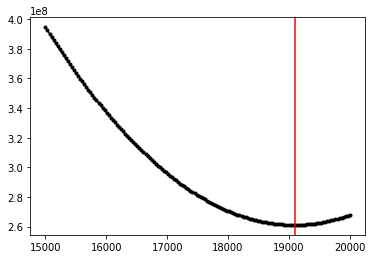

Minímos quadrados dos residuos: 261137183.73590595
Melhor valor de parametro: 19093.959731543626


In [32]:
plt.plot(teste, resultado, 'k.-')
plt.axvline(teste[np.argmin(resultado)], color='r')

plt.show()
print('Minímos quadrados dos residuos:', np.min(resultado))
print('Melhor valor de parametro:', teste[np.argmin(resultado)])

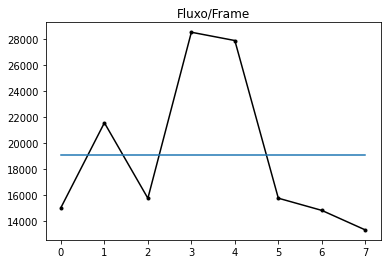

In [26]:
plt.title('Fluxo/Frame')
plt.plot(frame, fluxo_cal, 'k.-')
plt.plot(frame, func(19094,8))
plt.show()

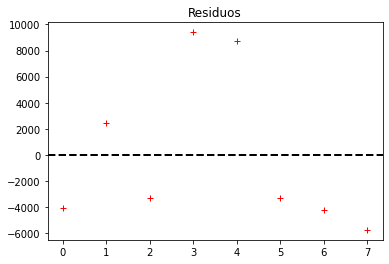

Soma dos quadrados dos residuos: 261137189.98790002


In [25]:
plt.title('Residuos')
plt.plot(frame, fluxo_cal - func(19094,8), 'r+')
plt.axhline(0, color='k', ls='--', lw=2)
plt.show()

print('Soma dos quadrados dos residuos:', residuo_quadrado(data=fluxo_cal, modelo=func(19094,8)))


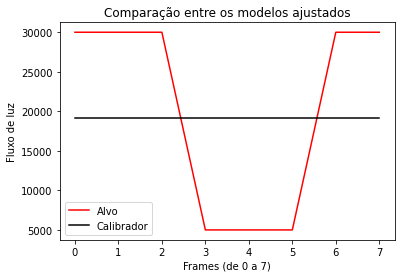

In [33]:
plt.title('Comparação entre os modelos ajustados')
plt.plot(frame, f_modelo, 'r-') #Alvo
plt.plot(frame, func(19094,8), 'k-') #Calibrador
plt.legend(['Alvo', 'Calibrador'])
plt.xlabel('Frames (de 0 a 7)')
plt.ylabel('Fluxo de luz')
plt.show()

 - O fluxo do calibrador possui certas variações baseadas nos erros sistemáticos da observação (medida), e são mais chamativos devido a pequena quantidade de frames escolhidos. Não só isso, se trata de um satélite de Urano, que possui fluxo médio inferior ao da estrela alvo. Mesmo assim, podemos observar que cada ponto (frame) medido antes e depois do evento seguem relativamente equivalentes (entre um frame e outro, quando há variação positiva do fluxo do alvo, o fluxo do calibrador aumenta também, e assim por diante). Durante o evento, inclusive, o brilho do calibrador chega a aumentar!
 - Ou seja, tudo indica que a ocultação foi de fato de algum objeto (Umbriel) e não uma falsa detecção. (Na verdade, o plot do ratio/frame também já indicava isso, visto que a ocultação continua visivel mesmo pegando o valor de fluxo relativo ao calibrador).